## Sms Spam Detetction...

SPAM SMS DETECTION

Build an AI model that can classify SMS messages as spam or legitimate.
Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages using machine learning in Python.

Download Dataset from [here](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
840,ham,I luv u soo much u donåÕt understand how speci...,NaN,NaN,NaN
1496,ham,I'm always on yahoo messenger now. Just send t...,NaN,NaN,NaN
5491,ham,U studying in sch or going home? Anyway i'll b...,NaN,NaN,NaN
2447,ham,Tmr then Ì_ brin lar... Aiya later i come n c ...,NaN,NaN,NaN
2799,ham,"House-Maid is the murderer, coz the man was mu...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

* Steps:
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

### 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# dropping the last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
1253,ham,Mum say we wan to go then go... Then she can s...
2458,ham,"Cool, I'll text you when I'm on the way"
3545,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW...
326,ham,Hi da:)how is the todays class?
4747,ham,The beauty of life is in next second.. which h...


In [6]:
# renaming the other 2 rows
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
3419,spam,"As a valued customer, I am pleased to advise y..."
2752,ham,Sat right? Okay thanks...
1353,ham,"Goodnight, sleep well da please take care pa. ..."
4376,ham,How much is torch in 9ja.
3091,ham,"Dear, take care. I am just reaching home.love ..."


In [7]:
# for ham and spam - using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [11]:
# removing duplicate values
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(5169, 2)

### 2. EDA

In [14]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

0 -> ham

1 -> spam

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

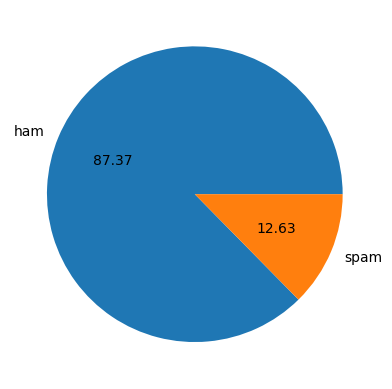

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%.2f')
plt.show()

Data is imbalanced.

In [18]:
import nltk

In [19]:
# nltk.download('punkt')

In [20]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [21]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [22]:
df['num_characters'] = df['text'].apply(len)
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# calculating number of words in text
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [24]:
# now calculating len of above
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [25]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# now checking how many sentences are there in text
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [27]:
# calculating length of above for number of sentences
df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [28]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
# checking just for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# checking just for spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
#!pip install seaborn
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

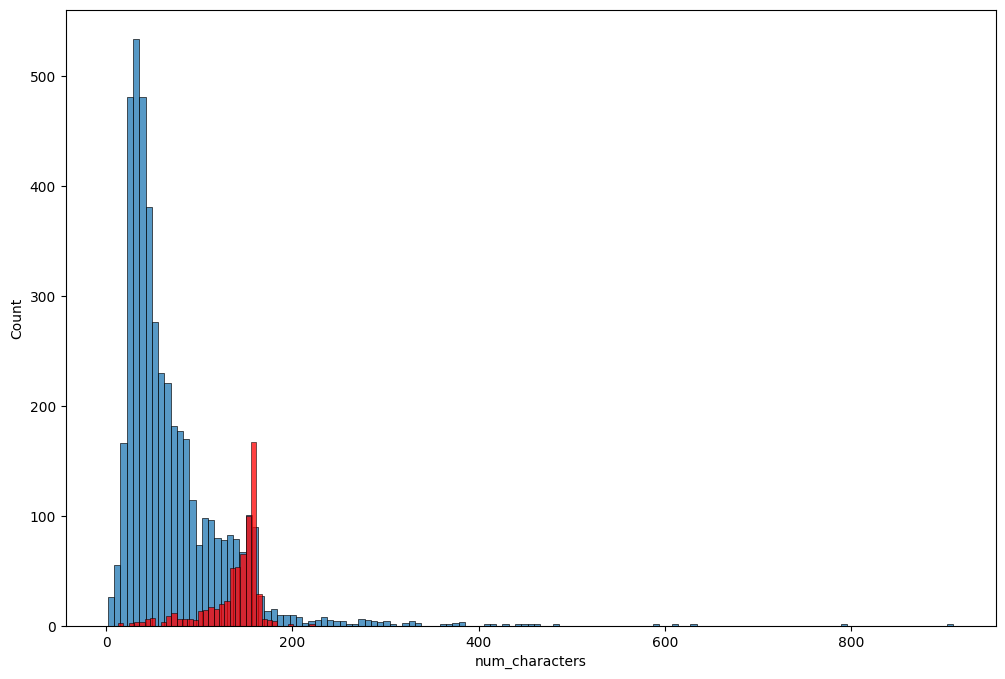

In [37]:
# for characters

plt.figure(figsize=(12,8))

sns.histplot(df[df['target'] == 0]['num_characters']) # -> for ham
sns.histplot(df[df['target'] == 1]['num_characters'], color='red') # -> for spam

<Axes: xlabel='num_words', ylabel='Count'>

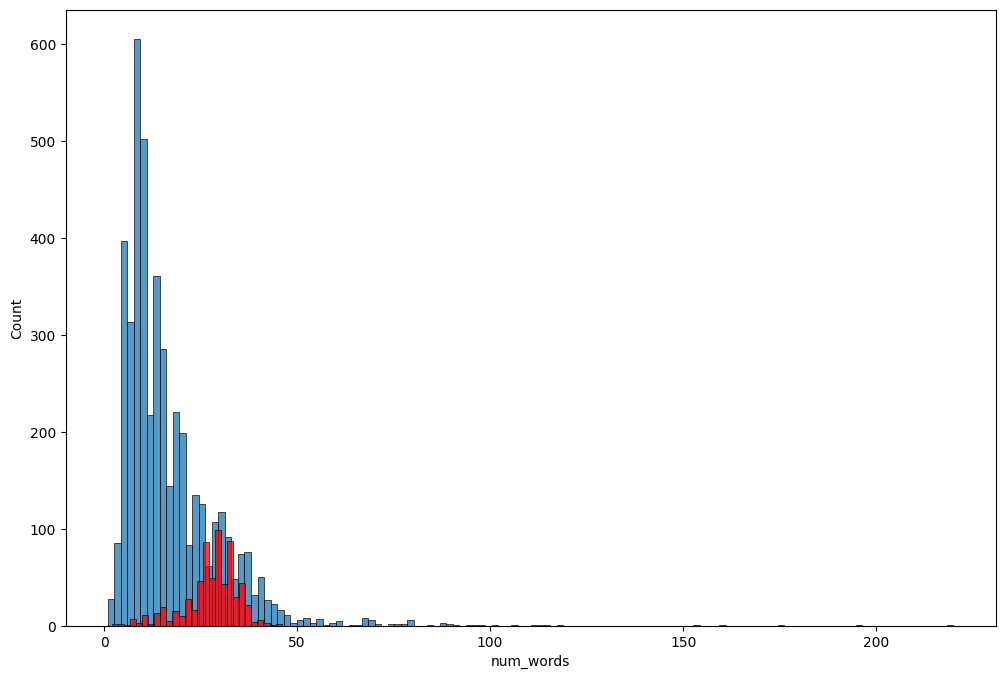

In [38]:
# for words

plt.figure(figsize=(12,8))

sns.histplot(df[df['target'] == 0]['num_words']) # -> for ham
sns.histplot(df[df['target'] == 1]['num_words'], color='red') # -> for spam

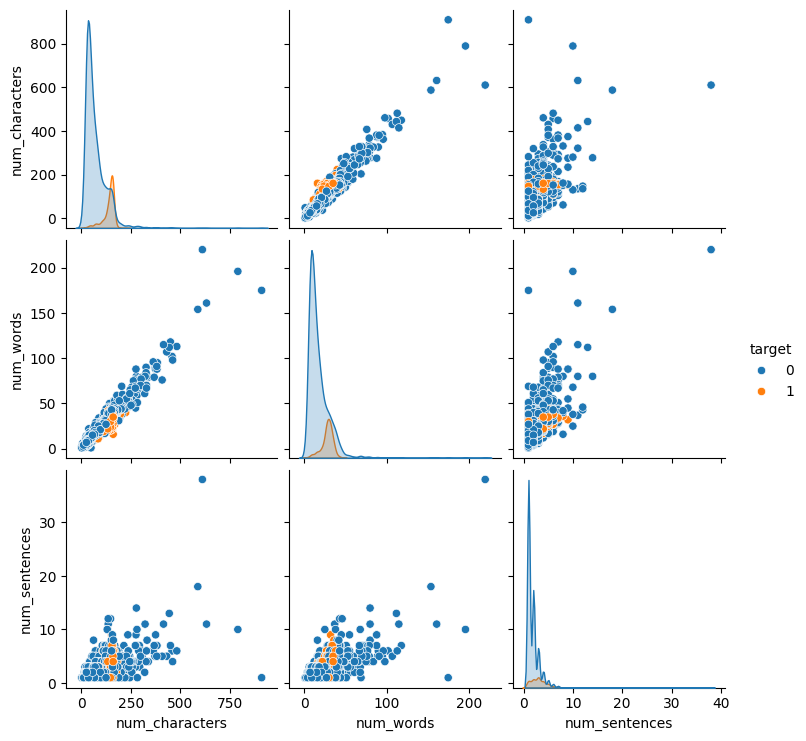

In [39]:
sns.pairplot(df, hue='target')

In [40]:
# for correlation matrix

df_dropped_text = df.drop('text', axis=1)
df_dropped_text.head()

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [41]:
df_dropped_text.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

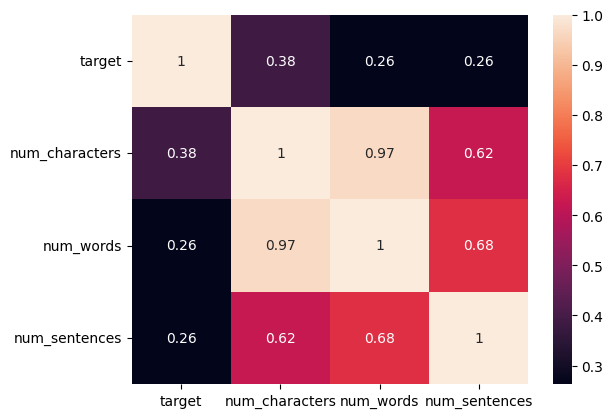

In [42]:
sns.heatmap(df_dropped_text.corr(), annot=True)

**Observation:**

1. For num_characters the more it goes towards 1, the more its tendancy is to become a spam.
2. num_sentences and num_words have more +ve relationship towrds num_characters, i.e., why multicollinearity occurs, and hence its better to take one of the 3 values
   * we'll take num_characters because it has higher correlation with target than the other two.

### 3. Data/Text Preprocessing

#### transforming text...

* Lowercase
* Tokenization
* Removing Special Characters
* Removing stop words & punctuation
* Stemming

In [43]:
# dummy function to convert the text into lowercase
def dummy_1(text):
    text = text.lower()
    return text

dummy_1('HI How are yOU')

'hi how are you'

In [44]:
# dummy function to do tokenization
def dummy_2(text):
    text = nltk.word_tokenize(text)
    return text

dummy_2('HI How are yOU')

['HI', 'How', 'are', 'yOU']

In [45]:
# dummy function to remove special characters
def dummy_3(text):
    text = nltk.word_tokenize(text) # list of words

    return_list = []
    for i in text:
        if i.isalnum():
            return_list.append(i)
    return return_list

dummy_3('he got 25% in his exams & got failed.')

['he', 'got', '25', 'in', 'his', 'exams', 'got', 'failed']

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
# dummy function to remove the stopwords
def dummy_4(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    temp_list = []
    for i in text:
        if i.isalnum():
            temp_list.append(i)

    text = temp_list[:]
    # dont do this text=temp_list cause thats cloning and clear will remove values in text as well
    temp_list.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp_list.append(i)
    
    return temp_list

dummy_4('HI How are yOU?')

['hi']

In [49]:
dummy_4('This is a project on Email Spam Detection.')

['project', 'email', 'spam', 'detection']

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('singing')

'sing'

In [51]:
ps.stem('writing')

'write'

In [52]:
# transform function to process text -> above steps + stemming
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    temp_list = []
    for i in text:
        if i.isalnum():
            temp_list.append(i)

    text = temp_list[:]
    # dont do this text=temp_list cause thats cloning and clear will remove values in text as well
    temp_list.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp_list.append(i)

    text = temp_list[:]
    temp_list.clear()

    for i in text:
        temp_list.append(ps.stem(i))
    
    return " ".join(temp_list)

text_transform('This is a project on Email Spam Detection & I hope you are finding it interesting.')

'project email spam detect hope find interest'

In [53]:
text_transform('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [54]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [55]:
text_transform(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [56]:
df['transformed_text'] = df['text'].apply(text_transform)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### making wordclouds for both ham and spam messages...

In [61]:
# !pip install wordcloud

In [60]:
# already installed in panda - wordcloud module
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

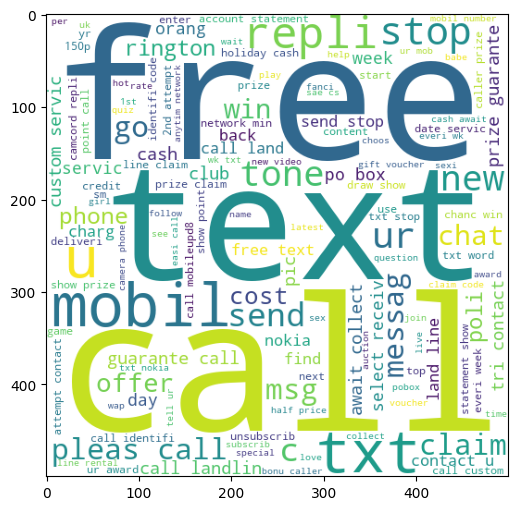

In [62]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

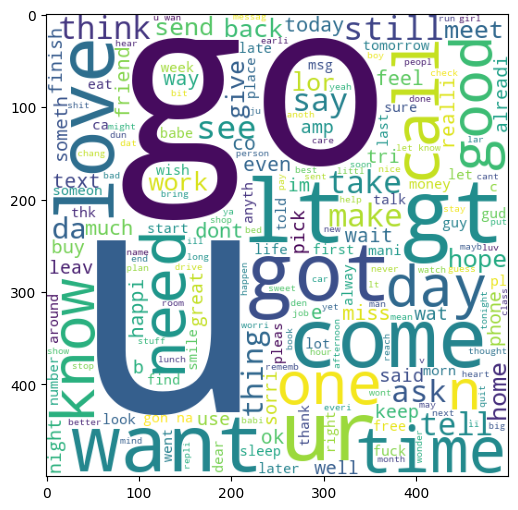

In [63]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

#### highest word counts of both the spam and ham messages...

##### for spam...

In [64]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
df[df['target']==1] # display only spam messages

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [66]:
df[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [67]:
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [68]:
for msg in df[df['target']==1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [69]:
spam_corpus = []

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [70]:
len(spam_corpus)

9939

In [71]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [72]:
# looking at the most common 30 words
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [73]:
# converting it into a data frame
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


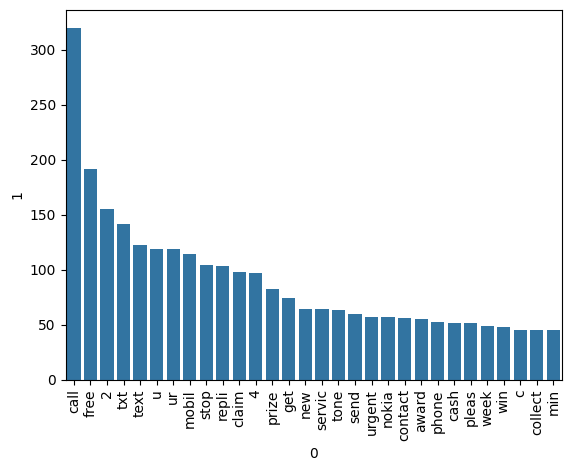

In [74]:
# barplot to showcase the most words used in spam messages
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical');

##### for ham...

In [75]:
ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [76]:
len(ham_corpus)

35404

In [77]:
Counter(ham_corpus)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [78]:
# looking at the top 30 words in ham corpus
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


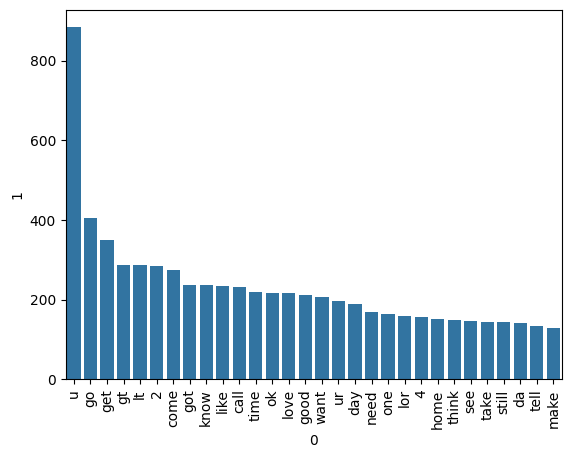

In [79]:
# barplot to showcase the most words used in ham messages
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical');

### 4. Model Building

* Naive Bayes model - common understanding that on textual data naive bayes model usually performs best

A model needs numerical inputs, so we'll have to convert our textual data into numerical values/vectors.

To do vectorization:
1. Bag of words - frequent words column gets created and how many times those words are in the text (that becomes the vectors) [Will be performing this]
2. TFIDF
3. Word to word

### 4.1 Using Bag of Words / Count Vectorizer

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [81]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [82]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
X.shape

(5169, 6708)

In [84]:
y = df['target'].values

In [85]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
y.shape

(5169,)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### Gaussian NB Model

In [89]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [91]:
print("Accuracy Score of GNB :", accuracy_score(y_test, y_pred1))
print("Precision Score of GNB :", precision_score(y_test, y_pred1))
print("Confusion Matrix of GNB :")
print(confusion_matrix(y_test, y_pred1))

Accuracy Score of GNB : 0.8684719535783365
Precision Score of GNB : 0.5185185185185185
Confusion Matrix of GNB :
[[772 117]
 [ 19 126]]


Precision Score is quite low...

#### Multinommial NB Model

In [92]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print("Accuracy Score of MNB :", accuracy_score(y_test, y_pred2))
print("Precision Score of MNB :", precision_score(y_test, y_pred2))
print("Confusion Matrix of MNB :")
print(confusion_matrix(y_test, y_pred2))

Accuracy Score of MNB : 0.9738878143133463
Precision Score of MNB : 0.8881578947368421
Confusion Matrix of MNB :
[[872  17]
 [ 10 135]]


#### Bernoulli NB Model

In [93]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("Accuracy Score of BNB :", accuracy_score(y_test, y_pred3))
print("Precision Score of BNB :", precision_score(y_test, y_pred3))
print("Confusion Matrix of BNB :")
print(confusion_matrix(y_test, y_pred3))

Accuracy Score of BNB : 0.9661508704061895
Precision Score of BNB : 0.9661016949152542
Confusion Matrix of BNB :
[[885   4]
 [ 31 114]]


### 4.2 Using TFIDF

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [95]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [96]:
X.shape

(5169, 6708)

In [97]:
y.shape

(5169,)

In [98]:
# splitting data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# gaussianNB on tfidf

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print("Accuracy Score of GNB :", accuracy_score(y_test, y_pred1))
print("Precision Score of GNB :", precision_score(y_test, y_pred1))
print("Confusion Matrix of GNB :")
print(confusion_matrix(y_test, y_pred1))

Accuracy Score of GNB : 0.8636363636363636
Precision Score of GNB : 0.5084033613445378
Confusion Matrix of GNB :
[[772 117]
 [ 24 121]]


In [100]:
# multinommialNB

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print("Accuracy Score of MNB :", accuracy_score(y_test, y_pred2))
print("Precision Score of MNB :", precision_score(y_test, y_pred2))
print("Confusion Matrix of MNB :")
print(confusion_matrix(y_test, y_pred2))

Accuracy Score of MNB : 0.9613152804642167
Precision Score of MNB : 0.9906542056074766
Confusion Matrix of MNB :
[[888   1]
 [ 39 106]]


Precision Score for the above.

In [101]:
# bernoulliNB

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("Accuracy Score of BNB :", accuracy_score(y_test, y_pred3))
print("Precision Score of BNB :", precision_score(y_test, y_pred3))
print("Confusion Matrix of BNB :")
print(confusion_matrix(y_test, y_pred3))

Accuracy Score of BNB : 0.9661508704061895
Precision Score of BNB : 0.9661016949152542
Confusion Matrix of BNB :
[[885   4]
 [ 31 114]]


We'll go with TFIDF - MNB because of the precision score.

Confusion Matrix of MNB :

[[888   1]
 [39 106]]
 
It's saying that only 1 email which was not classified as Spam was said to be Spam - Characteristic of a good Spam Detection Model.

#### Now trying different classification models...

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state=42)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
# function to train with different models

def train_classifier(clf_model, X_train, y_train, X_test, y_test):
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

# eg for the above function
train_classifier(mnb, X_train, y_train, X_test, y_test)

In [ ]:
# will run a loop on clfs dictionary - defined above 
# and will store accuracy and precision scores

accuracy_scores = []
precision_scores = []

i = 1
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(i ,"Model: ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    i = i+1 

In [ ]:
# sorted acc to precision in descending order

performance_df = pd.DataFrame({'Model': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [ ]:
performance_df

According to precision KN algorithm is giving the best score. But its accuracy score is very low.

But RF and NB algorithms are giving the most optimum scores in terms of both precision and accuracy.

#### trying to plot the performances...

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars ='Model')
performance_df1

In [ ]:
# plotting a bar plot
sns.catplot(x= 'Model',
            y='value',
            hue='variable',
            data=performance_df1,
            kind='bar',
            height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

### 6. Model Improvement

#### 1. Changing the max_features parameter of TFIDF
- meaning that for how much words do we want to vectorize

- At 1st we didn't gave it any value - meaning we took all the words (approx. there were 6700). So by applying this we can restrict the number of words.
- So if we are giving max_features parameters as 1000, it means the max 1000 words used in the corpus would be taken into consideration.

In [ ]:
# function to test best max_feature parameter

i = 1;
features_list = [50, 100, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000]
for no_of_features in features_list:
    tfidf = TfidfVectorizer(max_features=no_of_features)
    X = tfidf.fit_transform(df['transformed_text']).toarray()
    y = df['target'].values
    
    # splitting data into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # multinommialNB - because thats what fit the best last time

    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    
    print(i, "max_features value :", no_of_features)
    print("Accuracy Score of MNB :", accuracy_score(y_test, y_pred))
    print("Precision Score of MNB :", precision_score(y_test, y_pred))
    print("Confusion Matrix of MNB :")
    print(confusion_matrix(y_test, y_pred))
    i =i+1

So the best score was of feature 7: 2500

7 max_features value : 2500

Accuracy Score of MNB : 0.9748549323017408

Precision Score of MNB : 0.9917355371900827

Confusion Matrix of MNB :
[[888  1]
 [25 120]]


So we'll definetly take this into account and check for all the other algorithms/models.

In [ ]:
# will again run a loop on clfs dictionary - defined above 
# and will store accuracy and precision scores

tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
    
# splitting data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


accuracy_scores = []
precision_scores = []

i = 1
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(i ,"Model: ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    i = i+1

In [ ]:
# new data frame for max_features - 2500
# sorted acc to precision in descending order

performance_df2 = pd.DataFrame({'Model': clfs.keys(), 'Accuracy_2500':accuracy_scores, 'Precision_2500':precision_scores}).sort_values('Precision_2500', ascending=False)

In [ ]:
performance_df2

In [ ]:
performance_df = performance_df.merge(performance_df2, on='Model')

In [ ]:
performance_df

RF's precision got decreased. But in NB's, there were slight increases in both accuracy as well as precision. Making it quite a better fit.

#### 2. Applying Scaling on X

In [ ]:
X

In [ ]:
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
# now applying scaling on X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In the above MinMaxScaler is used because it ranges b/w 0 to 1.

While Standard Scaler was not used because it also gives -ve values which Naive Bayes algorithm doesn't accepts.

In [ ]:
X

In [ ]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print(i, "max_features value :", no_of_features)
print("Accuracy Score of MNB :", accuracy_score(y_test, y_pred))
print("Precision Score of MNB :", precision_score(y_test, y_pred))
print("Confusion Matrix of MNB :")
print(confusion_matrix(y_test, y_pred))

In [ ]:
accuracy_scores = []
precision_scores = []

i = 1
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(i ,"Model: ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    i = i+1

In [ ]:
# new data frame after scaling
# sorted acc to precision in descending order

performance_df3 = pd.DataFrame({'Model': clfs.keys(), 'Accuracy_Scaling':accuracy_scores, 'Precision_Scaling':precision_scores}).sort_values('Precision_Scaling', ascending=False)

In [ ]:
performance_df = performance_df.merge(performance_df3, on='Model')
performance_df

NB is still the better model/algorithm

Not much of a significant change but there was still a slight improvement.

#### 3. Adding num_characters also in the model

In [ ]:
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
X

In [ ]:
X.shape

In [ ]:
# adding the num_characters col to X
X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))

In [ ]:
X

In [ ]:
X.shape

In [ ]:
# applying scaling as well
X = scaler.fit_transform(X)
X

In [ ]:
# splitting data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracy_scores = []
precision_scores = []

i = 1
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(i ,"Model: ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    i = i+1

In [ ]:
# new data frame after adding num_chars
# sorted acc to precision in descending order

performance_df4 = pd.DataFrame({'Model': clfs.keys(), 'Accuracy_num_chars':accuracy_scores, 'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars', ascending=False)

# merging df4 in df
performance_df = performance_df.merge(performance_df4, on='Model')
performance_df

Again not much changes.

So from all the above 3 steps I can conclude that the best/effective model improvement technique was max_features scaling.

#### 4. Using Voting Classifier

Uses the combination of our best performing models (in terms of both precision as well as accuracy) - scv, mnb, rf

In [ ]:
# voting classifier models
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, random_state=42)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf', rf)], voting='soft')

In [ ]:
# splitting data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

voting.fit(X_train, y_train)

In [ ]:
y_pred = voting.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred))
print('Precision', precision_score(y_test, y_pred))

Again a slight but an increase in both accuracy as well as precision.

#### 5. Applying Stacking

Stacking is similar to voting, but in here we can give weightage to the models (unlike voting where all models are given equal weightage)

In [ ]:
estimators = [('svm', svc), ('nb', mnb), ('rf', rf)]
final_estimator = RandomForestClassifier() # this is our weightage model

from sklearn.ensemble import StackingClassifier

stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking.fit(X_train, y_train)

In [ ]:
y_pred = stacking.predict(X_test)
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Precision :', precision_score(y_test, y_pred))

### 7. Importing the files

In [102]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

#### website and deployment watch the video of campusX